In [1]:
from torch import nn
import numpy as np
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from  torch import optim 
from torchvision import transforms, utils, models

from collections import OrderedDict
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [2]:
data_dir = "/kaggle/input/dogs-cats-images/dataset/"

train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                transforms.RandomHorizontalFlip(),
                                transforms.Resize((280,280)),
                                transforms.ToTensor(),
                                transforms.Normalize([0.5, 0.5, 0.5],
                                [0.5, 0.5, 0.5])])
test_transforms = transforms.Compose([
                                transforms.Resize((280,280)),
                                transforms.ToTensor(),
                                transforms.Normalize([0.5, 0.5, 0.5],
                                [0.5, 0.5, 0.5])])

train_data = datasets.ImageFolder(data_dir + 'training_set', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + 'test_set', transform=test_transforms)

In [3]:
for image,label in train_data:
    print(image.shape)
    break


torch.Size([3, 280, 280])


In [4]:
trainloader = torch.utils.data.DataLoader(dataset=train_data, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(dataset=test_data, batch_size=64,shuffle=False)

In [5]:
iter_ = iter(trainloader)
image,label = next(iter_)
print(image.shape)
print(label)

torch.Size([64, 3, 280, 280])
tensor([0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
        0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1])


In [6]:
def image_convert(img):
    img = img.permute(1, 2, 0).cpu().numpy()
    return img * 0.5 + 0.5   # unnormalize


def plot_10():
    images, labels = next(iter(trainloader))
    classes = ['cat', 'dog']
    
    fig, axes = plt.subplots(2, 5, figsize=(12,6))
    for idx, ax in enumerate(axes.flat):
        img = image_convert(images[idx])
        ax.imshow(img)
        ax.set_title(classes[labels[idx].item()])
        ax.axis("off")
    plt.show()

            

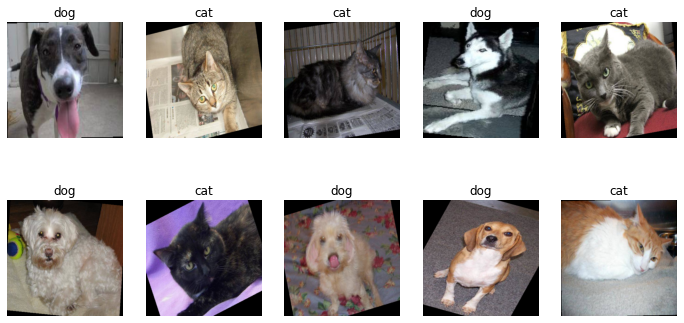

In [8]:
plot_10()

In [9]:
model =  models.resnet18(pretrained=True).to(device)
print(model)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [10]:
from torch import nn
class Dc_model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1=nn.Linear(512,120)
        self.linear2=nn.Linear(120,2)
    
    def forward(self,x):
        x = F.relu(self.linear1(x))
        x = self.linear2(x)
        return x

In [11]:
model_ = Dc_model().to(device)
model_

Dc_model(
  (linear1): Linear(in_features=512, out_features=120, bias=True)
  (linear2): Linear(in_features=120, out_features=2, bias=True)
)

In [12]:
model.fc = model_
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [13]:
for param in model.parameters():
        param.requires_grad = False
for param in model.fc.parameters():
        param.requires_grad = True

In [14]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.001)

In [15]:
train_loss = []
val_loss = []

epochs = 5

for epoch in range(epochs):
      print("epoch {}/{}".format(epoch+1,epochs))
      running_loss = 0.0
      running_score = 0.0
#       model.train()
      for image,label in trainloader:
          image = image.to(device)
          label = label.to(device)
          optimizer.zero_grad()
          y_pred = model.forward(image)
          loss = criterion(y_pred,label)         
          loss.backward() #calculate derivatives 
          optimizer.step() # update parameters
          val, index_ = torch.max(y_pred,axis=1)
          running_score += torch.sum(index_ == label.data).item()
          running_loss += loss.item()
      
      epoch_score = running_score/len(trainloader.dataset)
      epoch_loss = running_loss/len(trainloader.dataset)
      train_loss.append(epoch_loss)
      print("Training loss: {}, accuracy: {}".format(epoch_loss,epoch_score))
      
      with torch.no_grad():
          model.eval()
          running_loss = 0.0
          running_score = 0.0
          for image,label in testloader:
                image = image.to(device)
                label = label.to(device)
                optimizer.zero_grad()
                y_pred = model.forward(image)
                loss = criterion(y_pred,label)
                running_loss += loss.item()

                val, index_ = torch.max(y_pred,axis=1)
                running_score += torch.sum(index_ == label.data).item()
          
          epoch_score = running_score/len(testloader.dataset)
          epoch_loss = running_loss/len(testloader.dataset)
          val_loss.append(epoch_loss)
          print("Validation loss: {}, accuracy: {}".format(epoch_loss,epoch_score))

epoch 1/5
Training loss: 0.0024206576477736235, accuracy: 0.93975
Validation loss: 0.000819300988689065, accuracy: 0.984
epoch 2/5
Training loss: 0.001011138700414449, accuracy: 0.976
Validation loss: 0.0007418807551730424, accuracy: 0.984
epoch 3/5
Training loss: 0.0009731293588411063, accuracy: 0.97575
Validation loss: 0.0010309914672398009, accuracy: 0.976
epoch 4/5
Training loss: 0.0009558674290892668, accuracy: 0.9765
Validation loss: 0.000692295408109203, accuracy: 0.9865
epoch 5/5
Training loss: 0.0009402617451851256, accuracy: 0.97725
Validation loss: 0.0006522772301104851, accuracy: 0.986


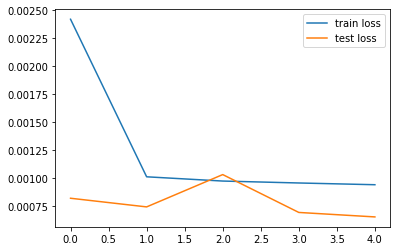

In [16]:
plt.plot(train_loss,label='train loss')
plt.plot(val_loss,label='test loss')
plt.legend()
plt.show()

In [20]:
def plot_val_images():

    label_dict = ['cat','dog']
 
    iter_ = iter(testloader)
    images,labels = next(iter_)
    images = images.to(device)
    pred_labels = labels.to(device)

    
    img_out = model.forward(images)
    value, index_val = torch.max(img_out, 1)

    # label = label_dict[str(label)]
    fig = plt.figure(figsize=(35,9))
    for idx in np.arange(10):
        ax = fig.add_subplot(2,5,idx+1)
        plt.imshow(image_convert(images[idx]))
        label = labels[idx]  
        pred_label = pred_labels[idx]
        ax.set_title('Act {},pred {}'.format(label_dict[label],label_dict[pred_label]))

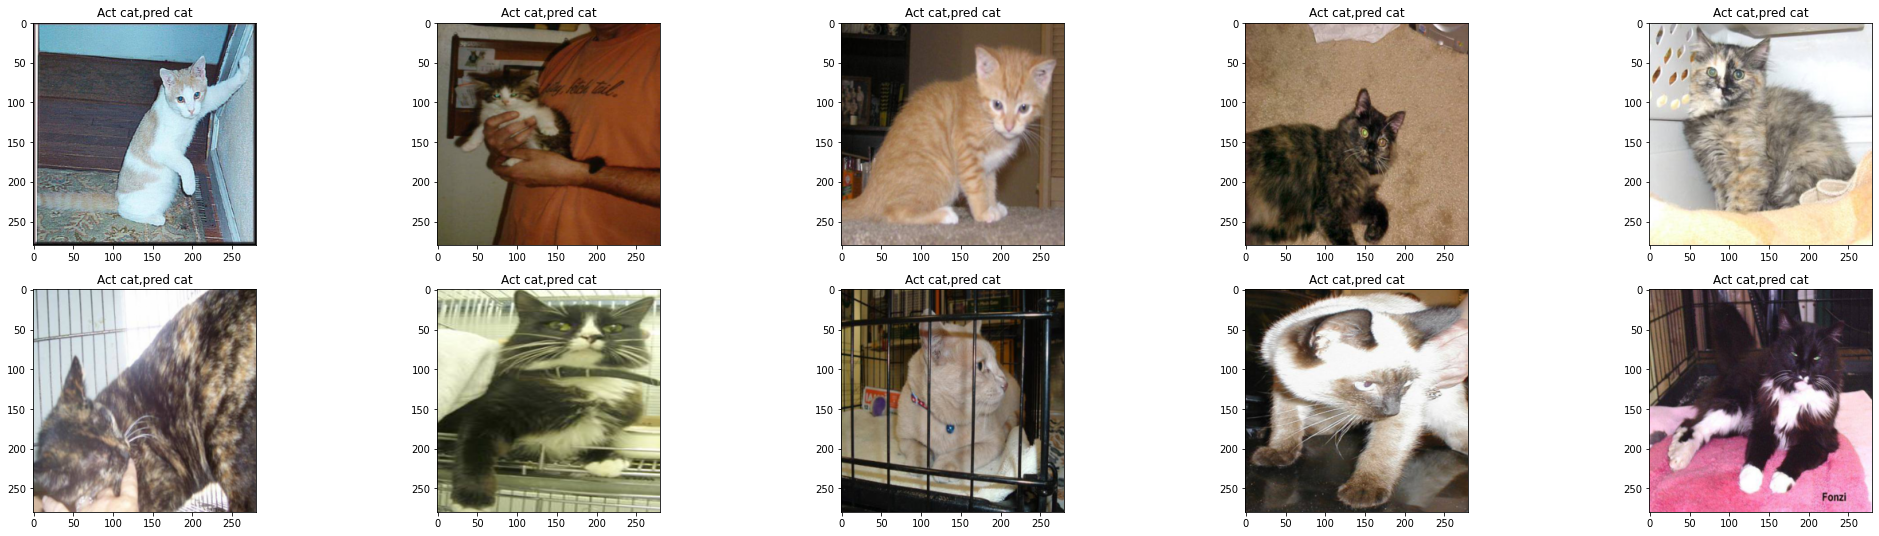

In [21]:
plot_val_images()